<a href="https://colab.research.google.com/github/s1c5000/kaggle/blob/main/pima-indians-diabetes/3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leemj5000","key":"9761000ca5f89a908cb4e6462dad9e0b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.5MB/s]


In [ ]:
!unzip '/content/pima-indians-diabetes-database.zip'

Archive:  /content/pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 셀 안에 그래프표시
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

## 전처리를 한 뒤 정확도를 볼 것이다      
보통 수치형 데이터의 경우 여러 구간값으로 나누어서 전처리를 한다     
하지만 이 과정이 항상 정확도를 높여주는 것은 아니다

In [ ]:
df["Pregnancies_high"] = df["Pregnancies"] > 6

In [ ]:
df[['Pregnancies','Pregnancies_high']]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


In [ ]:
# 8:2의 비율로 나누려한다
split_count = int(df.shape[0] * 0.8)
split_count

614

In [ ]:
# 슬라이싱으로 나누기
train = df[:split_count].copy()  # 명시적으로 copy()붙여준다
test = df[split_count:].copy()

print(train.shape)
print(test.shape)

(614, 10)
(154, 10)


In [ ]:
# data의 columns를 보고 나눠야한다.
print(train.columns)
print(type(train.columns))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Pregnancies_high'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [ ]:
# 정답값을 빼고, Pragnancies대신 Pragnancies_high를 쓸 것이기때문에 빼준다.  tolist()로 리스트로 만들기 가능
feature_names = train.columns.tolist()
print(feature_names)
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high']


['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [ ]:
# 정답값
label_name = "Outcome"
label_name

'Outcome'

학습,테스트 데이터 값들을 나눈다

In [ ]:
# 학습 data
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
0,148,72,35,0,33.6,0.627,50,False
1,85,66,29,0,26.6,0.351,31,False
2,183,64,0,0,23.3,0.672,32,True
3,89,66,23,94,28.1,0.167,21,False
4,137,40,35,168,43.1,2.288,33,False


In [ ]:
# 학습 label
Y_train = train[label_name]
print(Y_train.shape)
Y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# test data
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
614,138,74,26,144,36.1,0.557,50,True
615,106,72,0,0,25.8,0.207,27,False
616,117,96,0,0,28.7,0.157,30,False
617,68,62,13,15,20.1,0.257,23,False
618,112,82,24,0,28.2,1.282,50,True


In [ ]:
# test label
Y_test = test[label_name]
print(Y_test.shape)
Y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

학습및분석

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
model.fit(X_train,Y_train) # 학습

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

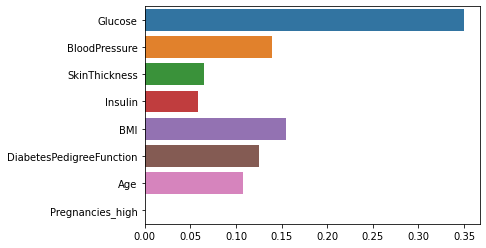

In [ ]:
# 피쳐중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

In [ ]:
# 예측
Y_predict = model.predict(X_test)

In [ ]:
# 실제값 - 예측값 을 빼주면 같은 값일때 0 이나온다
# 절대값을 씌워서 다른 값들만 샌다
# 전처리 전인 44개보다 줄었다

diff_count = abs(Y_test - Y_predict).sum()
diff_count

39

전처리하기전엔 Pregnancies가 중요도에 영향을 끼쳤는데 제거하고     
Pregnancies_high를 넣었지만 Pregnancies_high는 모델에 영향을 주지 못했다     
하지만 정확도가 더 올라간 것을 보면     
Pregnancies가 overfitting의 야기한 것으로 보인다

In [ ]:
# 구현된 알고리즘 가져와서 사용하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.7467532467532467

### age값을 나누어서 전처리해보겠다       
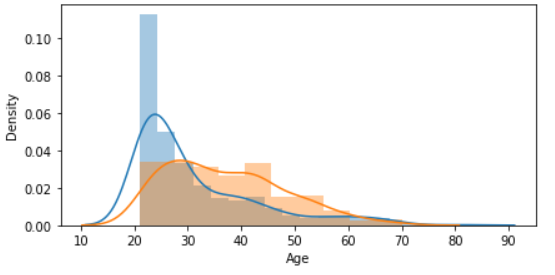

30정도에 나뉘는 것을 볼 수 있지만 일단 25 60 을 기준으로 나누어서 정확도를 볼 것이다

In [ ]:
df["Age_low"] = df["Age"] < 25
df['Age_middle'] = (df['Age'] >= 25) & (df['Age'] <= 60)  #pandas는 and 연산시 & 사용해야한다.
df["Age_high"] = df["Age"] > 60
df[['Age','Age_low','Age_middle','Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


In [ ]:
# Age를 나눈 것을 반영하려면 데이터를 나누는 것을 다시 해 줘야한다.
# 8:2의 비율로 나누려한다
split_count = int(df.shape[0] * 0.8)

# 슬라이싱으로 나누기
train = df[:split_count].copy()  # 명시적으로 copy()붙여준다
test = df[split_count:].copy()

print(train.shape)
print(test.shape)

feature_names = train.columns.tolist()

# 정답값을 빼고, Pragnancies대신 Pragnancies_high를 쓸 것이기때문에 빼준다.    tolist()로 리스트로 만들기 가능
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Age")
print(feature_names)

label_name = "Outcome"


# 학습 data
X_train = train[feature_names]
# 학습 label
Y_train = train[label_name]
# test data
X_test = test[feature_names]
# test label
Y_test = test[label_name]


(614, 15)
(154, 15)
['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies_high', 'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'low_glu_insulin']


In [ ]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,low_glu_insulin
0,148,72,35,0,33.6,0.627,False,False,True,False,206.0,False
1,85,66,29,0,26.6,0.351,False,False,True,False,130.0,False
2,183,64,0,0,23.3,0.672,True,False,True,False,206.0,False
3,89,66,23,94,28.1,0.167,False,True,False,False,94.0,True
4,137,40,35,168,43.1,2.288,False,False,True,False,168.0,False


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

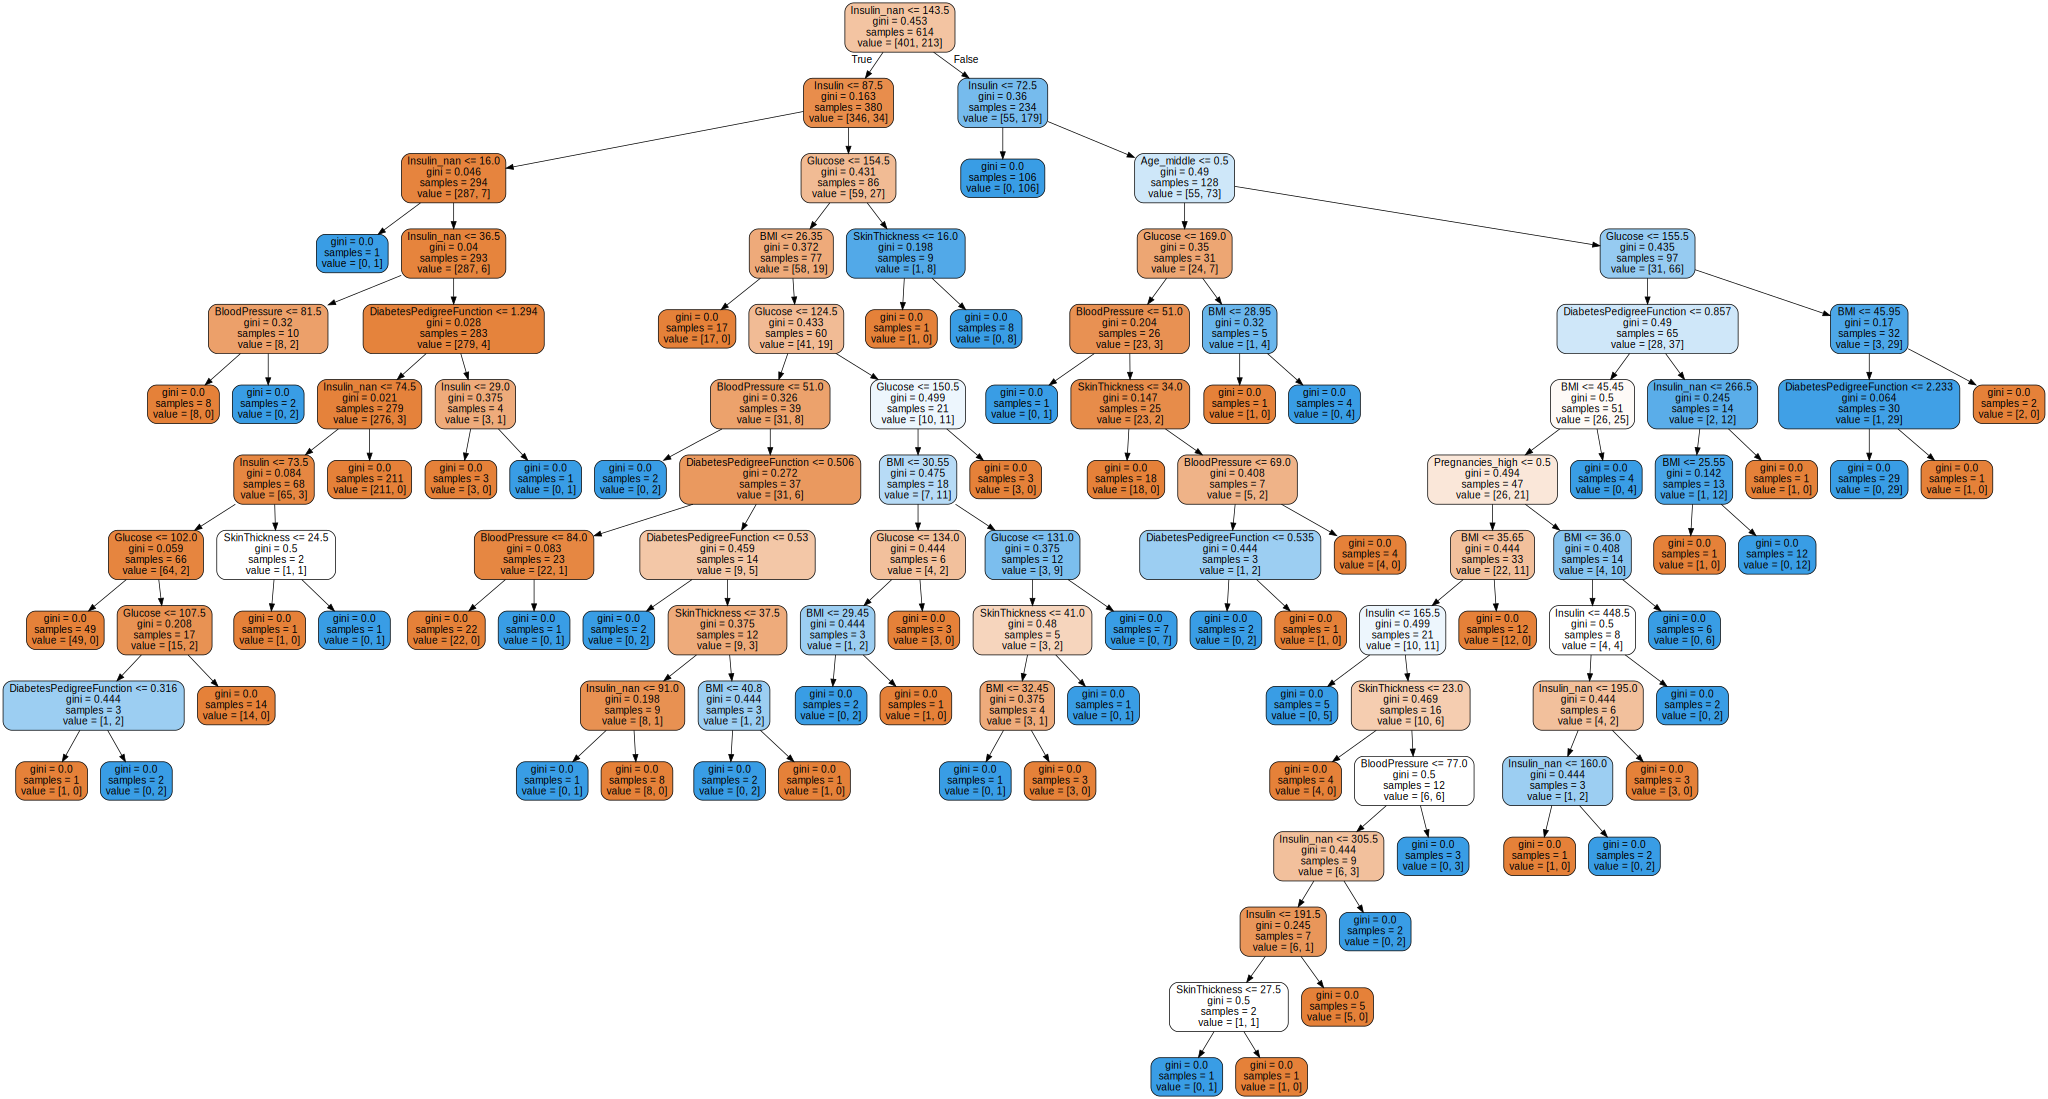

In [ ]:
# graphviz로 보면 크게나오고 그래프에 더 다양한 옵션을 줄 수 있다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True, rounded = True)
graphviz.Source(dot_tree)

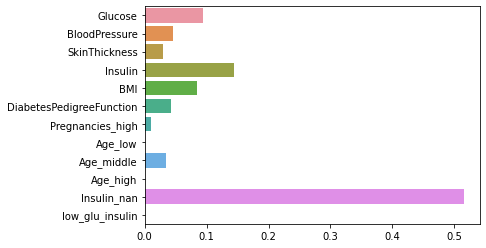

In [ ]:
# 피쳐중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

Age_middle이 조금 중요해 보인다

In [ ]:
Y_predict = model.predict(X_test)

diff_count = abs(Y_test - Y_predict).sum()
diff_count

21

44 -> 39 -> 49로 늘어나게되었다     
전처리시 확연히 구분되는 값으로 나누어서 하지않으면 떨어지는 경우가 있다    
위에서 Age를 확연히 구분되는 값으로 나누어 주지 않아서 오히려 떨어진 것으로 보인다     
후에 Age를 30으로 구분해서 측정해보았지만 55로 늘어나게되었다

In [ ]:
# 구현된 알고리즘 가져와서 사용하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.8636363636363636

## 결측치 다루기

0이들어가면 안되는 값들이 0이들어간것으로 보아 결측치라고 생각된다     

In [ ]:
#0값을 nan값으로 바꾸겠다
df["Insulin_nan"] = df['Insulin'].replace(0, np.nan)


In [ ]:
df["Insulin_nan"].isnull().sum()

374

In [ ]:
# 결측치 처리해준 값들이 Outcome이 0 1 일때 각각의 평균이 차이나는 것을 볼 수있다. 

df.groupby(['Outcome'])["Insulin", 'Insulin_nan'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [ ]:
# 결측치를 채우기위해 describe()로 평균 중앙값 등을 본다
df.groupby(['Outcome'])["Insulin", 'Insulin_nan'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Insulin                               ... Insulin_nan                      
          count        mean         std  min  ...         25%    50%     75%    max
Outcome                                       ...                                  
0         500.0   68.792000   98.865289  0.0  ...        66.0  102.5  161.25  744.0
1         268.0  100.335821  138.689125  0.0  ...       127.5  169.5  239.25  846.0

[2 rows x 16 columns]

In [ ]:
# mean, median값만 뽑아보겠다
df.groupby(['Outcome'])["Insulin", 'Insulin_nan'].agg(['mean','median'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [ ]:
# 결측치 채우기
df[df['Insulin_nan'].isnull()] # Insulin_nan이 True이고
df[df['Outcome']==1] # 발병을 한 사람
# loc은 특정행을 가져올때 사용한다
# df.loc[[행 조건],'열'] 하면 행조건과 겹치는 열을 출력한다.
df.loc[(df['Outcome'] == 1) & df['Insulin_nan'].isnull(), 'Insulin_nan'] = 206 # 결측치를 206으로 채웠다

In [ ]:
df.loc[(df['Outcome'] == 0) & df['Insulin_nan'].isnull(), 'Insulin_nan'] = 130 # 발병하지않고 인슐린이 결측치인 것을 130으로 채웠다.

In [ ]:
df.loc[(df['Insulin_nan'] == 0), 'Insulin_nan'] # 0인 값들이 없다.

Series([], Name: Insulin_nan, dtype: float64)

결측치를 평균값으로 채워줬으니 다시 정확도를 측정해 보겠다

In [ ]:
# Age를 나눈 것을 반영하려면 데이터를 나누는 것을 다시 해 줘야한다.
# 8:2의 비율로 나누려한다
split_count = int(df.shape[0] * 0.8)

# 슬라이싱으로 나누기
train = df[:split_count].copy()  # 명시적으로 copy()붙여준다
test = df[split_count:].copy()

print(train.shape)
print(test.shape)

feature_names = train.columns.tolist()

# 정답값을 빼고, Pragnancies대신 Pragnancies_high를 쓸 것이기때문에 빼준다.    tolist()로 리스트로 만들기 가능
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
print(feature_names)

label_name = "Outcome"


# 학습 data
X_train = train[feature_names]
# 학습 label
Y_train = train[label_name]
# test data
X_test = test[feature_names]
# test label
Y_test = test[label_name]


(614, 14)
(154, 14)
['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

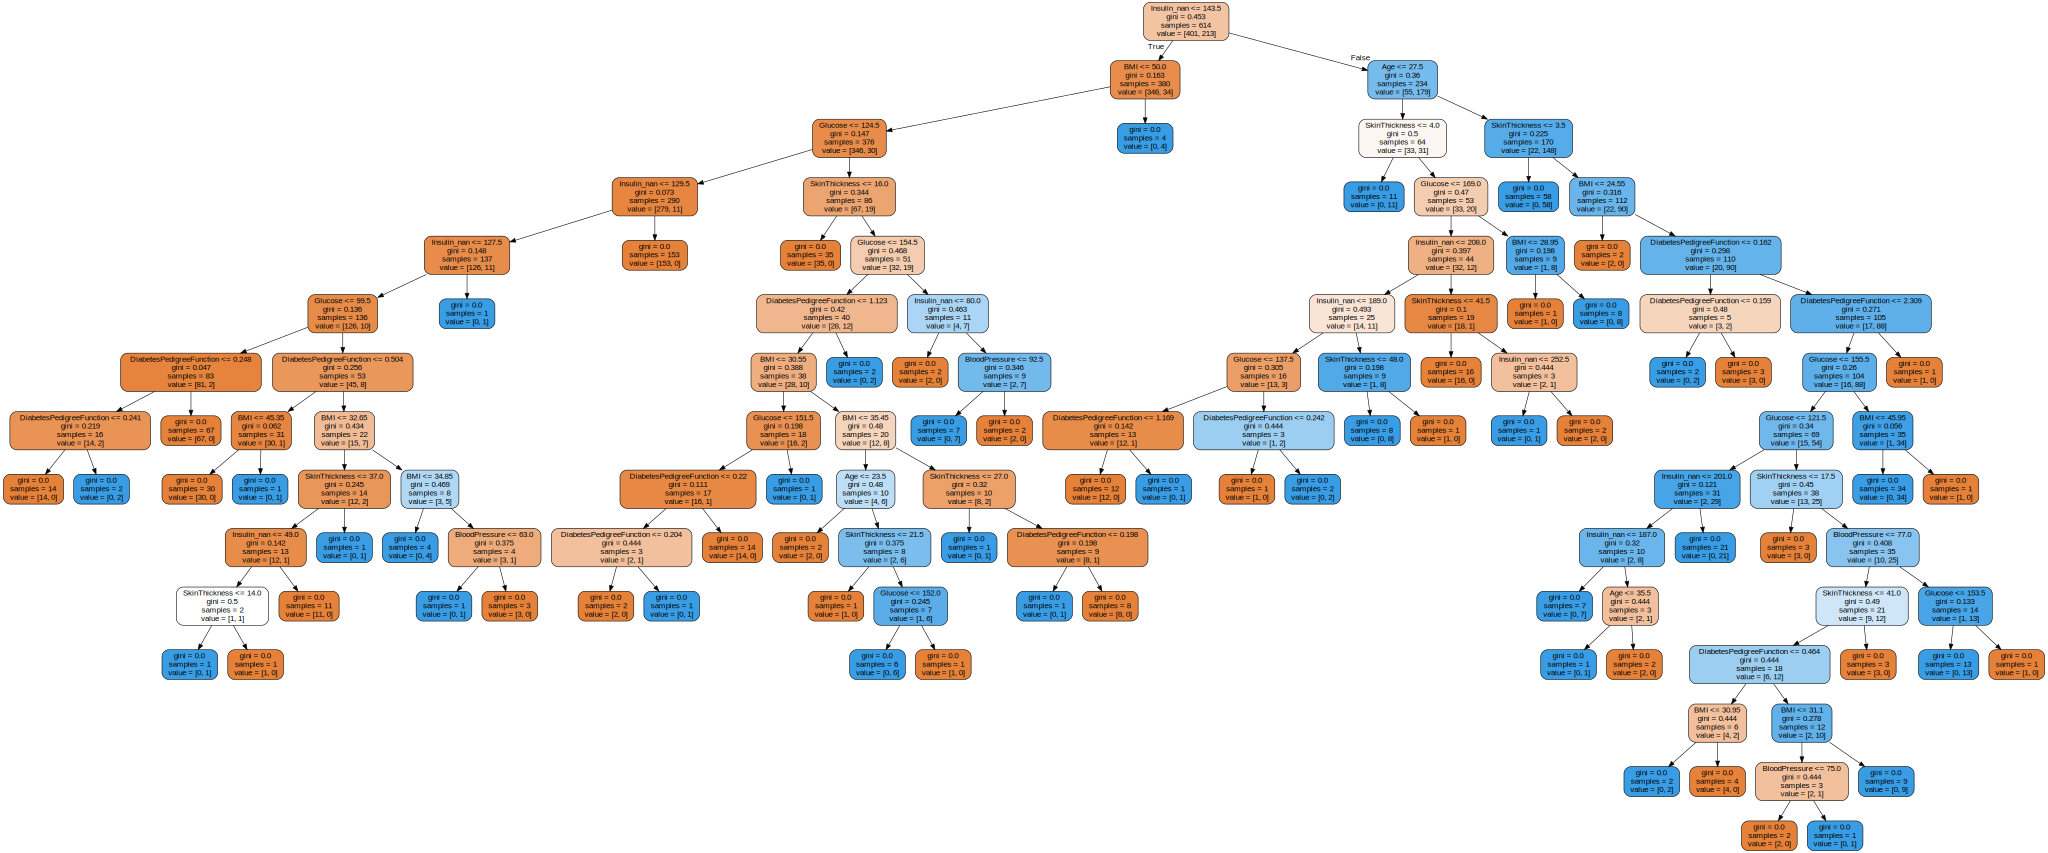

In [ ]:
# graphviz로 보면 크게나오고 그래프에 더 다양한 옵션을 줄 수 있다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True, rounded = True)
graphviz.Source(dot_tree)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


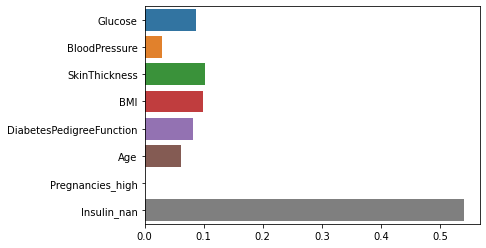

In [ ]:
# 중요도가 Insulin_nan이 가장 영향을 주는 것으로 나왔다
sns.barplot(model.feature_importances_, y = feature_names)

In [ ]:
model.score(X_test,Y_test)

0.8506493506493507

In [ ]:
pred = model.predict(X_test)
abs(pred - Y_test).sum()

23

인슐린 결측치를 평균값으로 대체하니깐 정확도가 많이 올라갔다.    
그대로(44) -> Pregnancies제거(39) -> Age범주화(49) => 인슐린 결측치 대체(23)

Insulin 결측치를 중앙값(median)으로 대체하면 더욱 성능이 좋아지는 것을 볼 수 있다      
그대로(44) -> Pregnancies제거(39) -> Age범주화(49) => 인슐린 결측치 평균값 대체 (23) => 인슐린 결측치 중앙값 대체(16)

## Insulin 결측치를 결정트리로 예측 한뒤 Outcome을 예측

In [ ]:
n_df = pd.read_csv('/content/diabetes.csv')

In [ ]:
n_df.shape

(768, 9)

In [ ]:
n_df_train = n_df[n_df['Insulin'] != 0]
n_df_test = n_df[n_df['Insulin'] == 0]
n_df_train.shape, n_df_test.shape

((394, 9), (374, 9))

In [ ]:
ft = n_df_train.columns.to_list()
ft.remove('Insulin')
ft.remove("Outcome")
ft

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
n_df_train_x = n_df_train[ft]
n_df_train_y = n_df_train['Insulin']

In [ ]:
n_df_test_x = n_df_test[ft]
n_df_test_y = n_df_test['Insulin']

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=42)
clf.fit(n_df_train_x,n_df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
pred_Insulin = clf.predict(n_df_test_x)
pred_Insulin

array([110.,  37., 130., 112., 182., 326., 160., 185., 326.,  54., 165.,
       145., 200.,  78., 210., 175., 190.,  64., 360.,  22., 156.,  54.,
       125.,  74., 140., 465., 105.,  45.,  78.,  64.,  54., 114.,  95.,
       155.,  43., 105.,  36.,  99., 145., 210.,  45.,  94.,  50.,  92.,
       140.,  71.,  82.,  66., 112., 370., 105., 140.,  54., 326.,  87.,
       140., 291., 326., 115.,  44.,  55., 600.,  77.,  88.,  86., 142.,
       326., 188., 258., 495., 106., 180., 326., 175., 190.,  90.,  48.,
       600.,  66.,  87., 207., 210., 130.,  87.,  58., 387.,  78., 125.,
       105.,  99., 106., 370., 235.,  66.,  40., 360., 192.,  82., 140.,
       210.,  66., 112.,  99., 370., 152., 120., 600., 304.,  23., 130.,
       300., 106., 105., 600., 112.,  90., 128., 680., 328., 240., 680.,
       150.,  44.,  87., 106., 145., 126., 285., 190., 360.,  37., 200.,
        44., 100.,  83.,  57., 600., 140.,  83., 235., 105.,  70., 220.,
       326., 105.,  71., 258., 328., 100., 258., 14

In [ ]:
n_df_test['Insulin'] = pred_Insulin

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
n_df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,110.0,33.6,0.627,50,1
1,1,85,66,29,37.0,26.6,0.351,31,0
2,8,183,64,0,130.0,23.3,0.672,32,1
5,5,116,74,0,112.0,25.6,0.201,30,0
7,10,115,0,0,182.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,265.0,44.0,0.403,43,1
762,9,89,62,0,66.0,22.5,0.142,33,0
764,2,122,70,27,328.0,36.8,0.340,27,0
766,1,126,60,0,140.0,30.1,0.349,47,1


In [ ]:
n_df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [ ]:
n_data=pd.concat([n_df_train,n_df_test])
n_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
6,3,78,50,32,88.0,31.0,0.248,26,1
8,2,197,70,45,543.0,30.5,0.158,53,1
13,1,189,60,23,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,265.0,44.0,0.403,43,1
762,9,89,62,0,66.0,22.5,0.142,33,0
764,2,122,70,27,328.0,36.8,0.340,27,0
766,1,126,60,0,140.0,30.1,0.349,47,1


In [ ]:
n_data = n_data.sort_index()
n_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,110.0,33.6,0.627,50,1
1,1,85,66,29,37.0,26.6,0.351,31,0
2,8,183,64,0,130.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,328.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,140.0,30.1,0.349,47,1


In [ ]:
# Age를 나눈 것을 반영하려면 데이터를 나누는 것을 다시 해 줘야한다.
# 8:2의 비율로 나누려한다
split_count = int(n_data.shape[0] * 0.8)

# 슬라이싱으로 나누기
train = n_data[:split_count].copy()  # 명시적으로 copy()붙여준다
test = n_data[split_count:].copy()

print(train.shape)
print(test.shape)

feature_names = train.columns.tolist()

# 정답값을 빼고, Pragnancies대신 Pragnancies_high를 쓸 것이기때문에 빼준다.    tolist()로 리스트로 만들기 가능
feature_names.remove("Outcome")
print(feature_names)

label_name = "Outcome"


# 학습 data
X_train = train[feature_names]
# 학습 label
Y_train = train[label_name]
# test data
X_test = test[feature_names]
# test label
Y_test = test[label_name]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(614, 9)
(154, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


((614, 8), (614,), (154, 8), (154,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

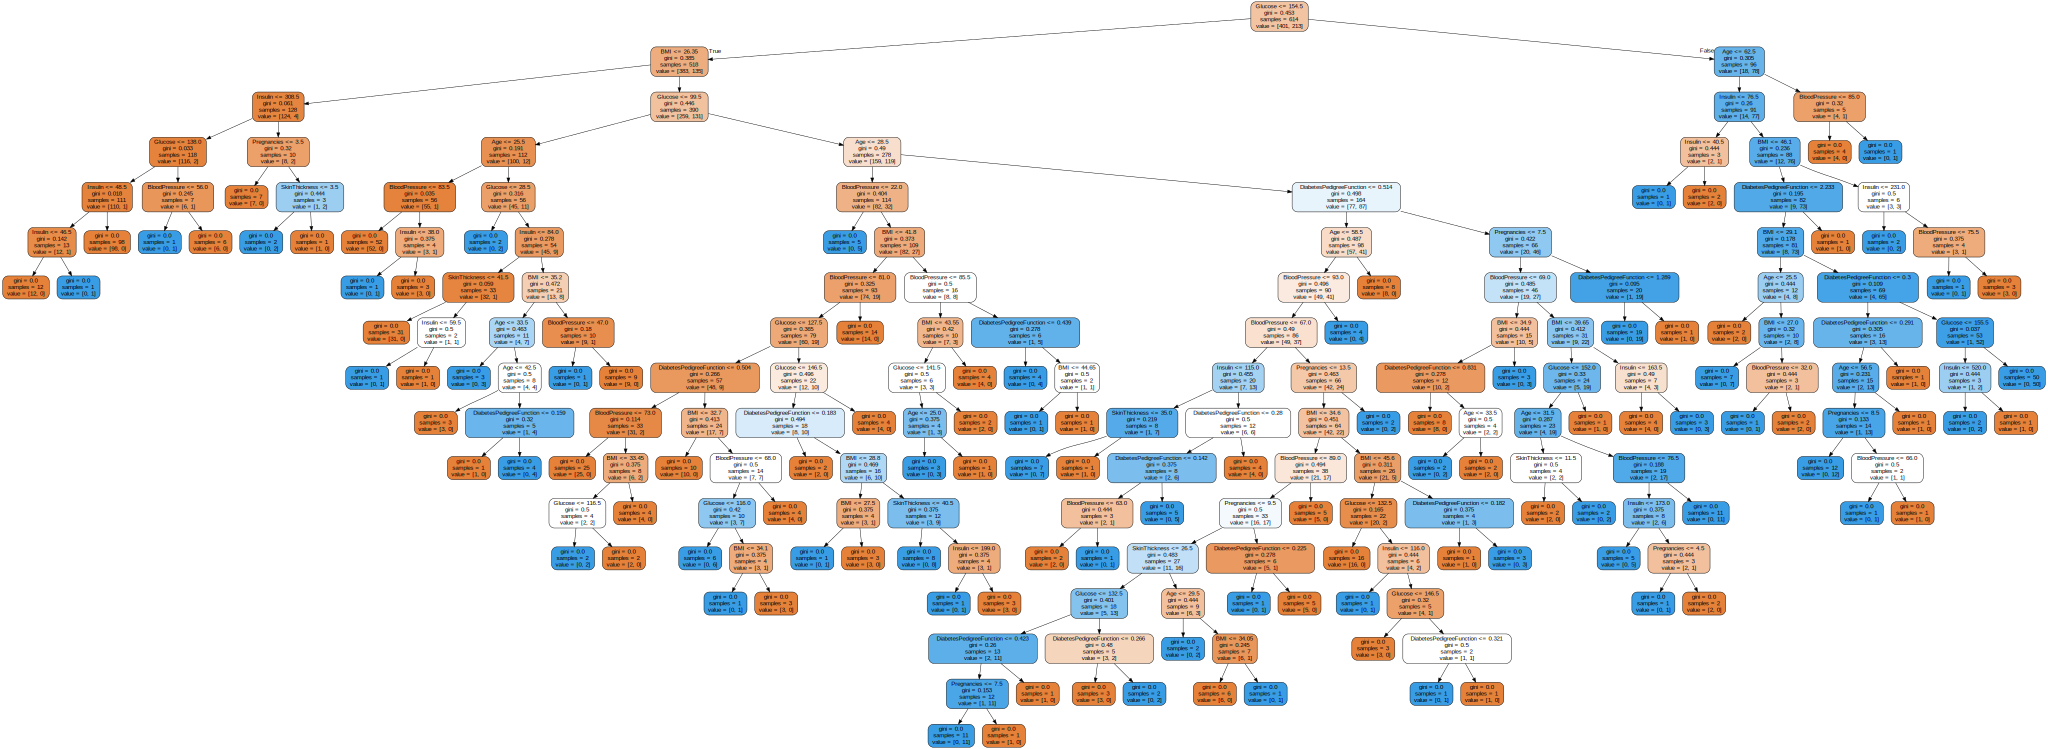

In [ ]:
# graphviz로 보면 크게나오고 그래프에 더 다양한 옵션을 줄 수 있다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names = feature_names,
filled=True, rounded = True)
graphviz.Source(dot_tree)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


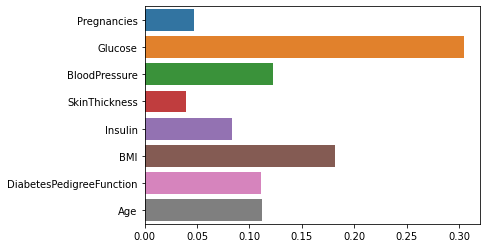

In [ ]:
sns.barplot(model.feature_importances_, y = feature_names)

In [ ]:
pred = model.predict(X_test)
abs(pred - Y_test).sum()

45

In [ ]:
model.score(X_test,Y_test)

0.7077922077922078

인슐린의 결측치를 결정트리로 예상 후 모델을 돌려보았으니 그리 높은 점수가나오진 않았다

## 파생변수 만들어서 넣어주기

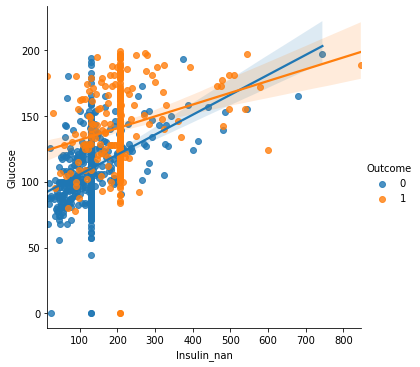

In [ ]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

위 그래프를 보면 Glucose가 100이하고 Insulin_nan이 중앙값으로 채워준 102이하일때      
거의 발병 하지않는 것을 볼 수 있다.      
이를 파생변수로 만들어서 넣어주겠다

In [ ]:
df['low_glu_insulin'] = (df['Glucose']  < 100) & (df['Insulin_nan'] <= 102.5) # 파생변수 생성
df['low_glu_insulin']

0      False
1      False
2      False
3       True
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: low_glu_insulin, Length: 768, dtype: bool

In [ ]:

pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,418,82
1,263,5


In [ ]:
# Age를 나눈 것을 반영하려면 데이터를 나누는 것을 다시 해 줘야한다.
# 8:2의 비율로 나누려한다
split_count = int(df.shape[0] * 0.8)

# 슬라이싱으로 나누기
train = df[:split_count].copy()  # 명시적으로 copy()붙여준다
test = df[split_count:].copy()

print(train.shape)
print(test.shape)

feature_names = train.columns.tolist()

# 정답값을 빼고, Pragnancies대신 Pragnancies_high를 쓸 것이기때문에 빼준다.    tolist()로 리스트로 만들기 가능
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
print(feature_names)

label_name = "Outcome"


# 학습 data
X_train = train[feature_names]
# 학습 label
Y_train = train[label_name]
# test data
X_test = test[feature_names]
# test label
Y_test = test[label_name]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(614, 15)
(154, 15)
['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan', 'low_glu_insulin']


((614, 9), (614,), (154, 9), (154,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


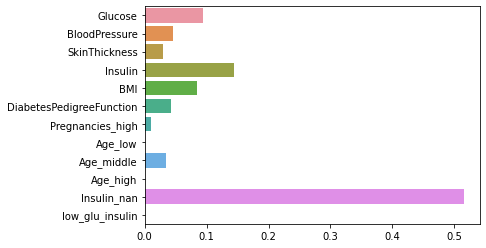

In [ ]:
sns.barplot(model.feature_importances_, y = feature_names)

In [ ]:
pred = model.predict(X_test)
abs(pred - Y_test).sum()

21

In [ ]:
# 구현된 알고리즘 가져와서 사용하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_predict)

0.8636363636363636

파생변수를 만들어서 넣어주는 방법도 정확도를 올리는데 도움이 된다

## 정규화

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

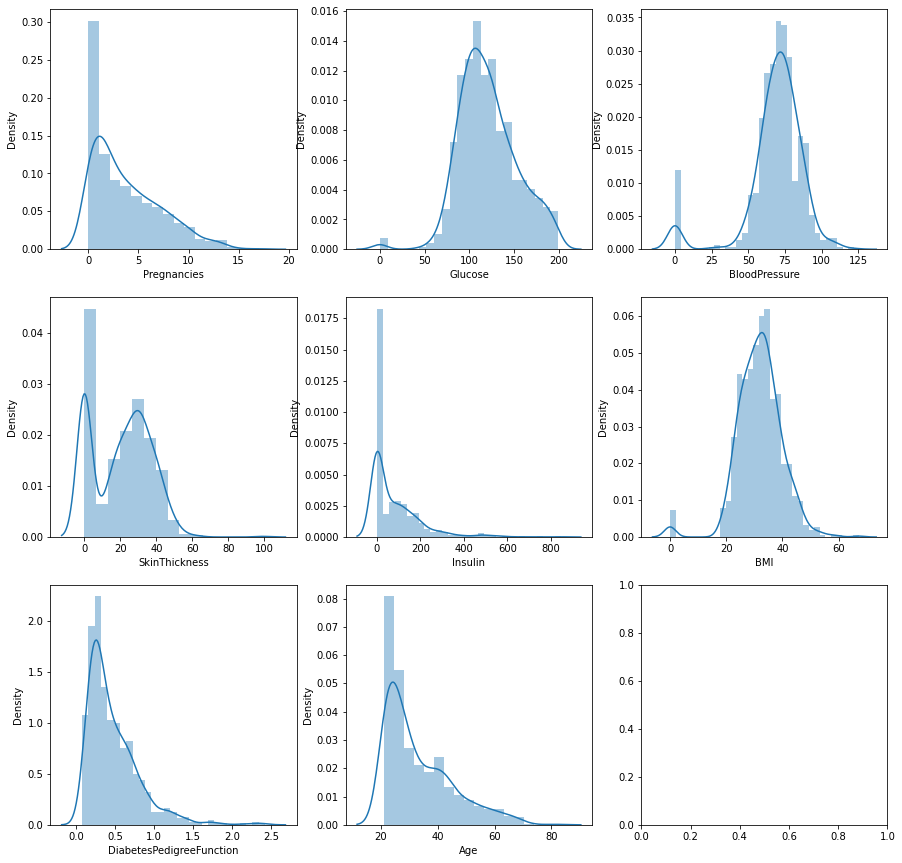

In [ ]:
cols = df.columns[:-1].tolist()
print(cols)

# distplot으로 subplot을 그린다.
fig, axes = plt.subplots(nrows = 3, ncols= 3, figsize=(15,15))

for i, col_name in enumerate(cols):
  row = i//3
  col = i%3
  # ax로 어느 곳에 그릴지 지정가능
  sns.distplot(df[col_name], ax=axes[row][col])

위 그래프를 보면 값들의 범위가 다 다르다      
값들을 스케일 해주는 것이 정확한 예측의 도움을 준다

In [ ]:
# standardScaler로 범위를 같게 만들어 줄 수 있다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Glucose', 'DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose', 'DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [ ]:
df[['Glucose', 'DiabetesPedigreeFunction']] = scale

In [ ]:
df[['Glucose', 'DiabetesPedigreeFunction']].head()

,Glucose,DiabetesPedigreeFunction
0,0.848324,0.468492
1,-1.123396,-0.365061
2,1.943724,0.604397
3,-0.998208,-0.920763
4,0.504055,5.484909


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0d791bfd0>,
      dtype=object)

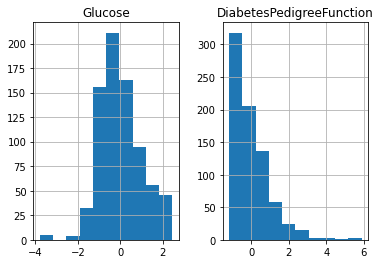

In [ ]:
df[['Glucose', 'DiabetesPedigreeFunction']].hist()

In [ ]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df["Insulin_nan"] = df['Insulin'].replace(0, np.nan)
df.loc[(df['Outcome'] == 1) & df['Insulin_nan'].isnull(), 'Insulin_nan'] = 169 # 결측치를 169으로 채웠다
df.loc[(df['Outcome'] == 0) & df['Insulin_nan'].isnull(), 'Insulin_nan'] = 102 # 발병하지않고 인슐린이 결측치인 것을 102으로 채웠다.
df['low_glu_insulin'] = (df['Glucose']  < 100) & (df['Insulin_nan'] <= 102.5) # 파생변수 생성

In [ ]:
# Age를 나눈 것을 반영하려면 데이터를 나누는 것을 다시 해 줘야한다.
# 8:2의 비율로 나누려한다
split_count = int(df.shape[0] * 0.8)

# 슬라이싱으로 나누기
train = df[:split_count].copy()  # 명시적으로 copy()붙여준다
test = df[split_count:].copy()

print(train.shape)
print(test.shape)

feature_names = train.columns.tolist()

# 정답값을 빼고, Pragnancies대신 Pragnancies_high를 쓸 것이기때문에 빼준다.    tolist()로 리스트로 만들기 가능
feature_names.remove("Outcome")
feature_names.remove("Pregnancies")
feature_names.remove("Insulin")
print(feature_names)

label_name = "Outcome"


# 학습 data
X_train = train[feature_names]
# 학습 label
Y_train = train[label_name]
# test data
X_test = test[feature_names]
# test label
Y_test = test[label_name]


(614, 12)
(154, 12)
['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan', 'low_glu_insulin']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


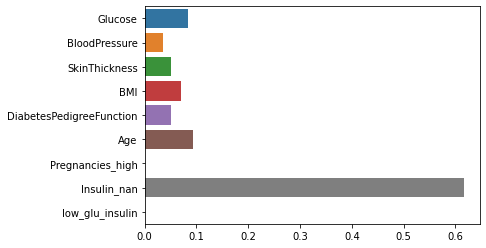

In [ ]:
sns.barplot(model.feature_importances_, y = feature_names)

In [ ]:
pred = model.predict(X_test)
abs(pred - Y_test).sum()

19

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_predict)

0.8636363636363636

## csv파일로 저장하기

In [ ]:
df.to_csv("diabetes_feature.csv", index=False) # index=False안하면 index까지 저장되어 불러올때 중복된다

In [ ]:
pd.read_csv('/content/diabetes_feature.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,169.0,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,102.0,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,169.0,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,94.0,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,168.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,76,48,180,32.9,-0.908682,63,0,True,180.0,False
764,2,0.034598,70,27,0,36.8,-0.398282,27,0,False,102.0,True
765,5,0.003301,72,23,112,26.2,-0.685193,30,0,False,112.0,False
766,1,0.159787,60,0,0,30.1,-0.371101,47,1,False,169.0,False
